# Squid Game Effect ETL & EDA
<a id="toc"></a>
Table of Contents
* [1.0 Introduction - Analysis](#section_01)
* [2.0 Data Sources & ETL Process](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_
* [3.0 Part 1 The Mystery - Unexpected Global Interest](#section_03)
* [4.0 Part 2 The Correlation Evidence](#section_04)
* [5.0 Part 3 The Smoking Gun - Squid Game Experiments](#section_05)
* [6.0 Part 4 The Geographic Proof](#section_06)
* [7.0 Part 5 The Sustained Wave - Beyond Viral Moments](#section_07)
* [8.0 Limitations & Conclusions](#section_08)
* [9.0 Credits](#section_09)

In [20]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # sets a white background with grid lines 
import plotly.express as px

In [21]:
# System and OS related tasks
import sys
import os
import importlib
# Add the project root to Python path
project_root = os.path.abspath('..')
sys.path.insert(0, project_root)

# path to directories
processed_dir = '../data/processed'

In [22]:
# import python scripts
from src.visualisation.processed_filepaths import processed_filepaths

<a id="section_01"></a>
## 1.0 Introduction - Analysis
For decades, language learning was predictable: English, Spanish and French were the languages of choice. Hoowever, in 2018, Duolingo's data detectives spotted an anomaly. They noticed that interests in Korean culture and language are surging in countries with no historical ties to Korea.

Their hyoothesis? The K-pop and K-drama effect.  Duolinga began weaving famous K-drama lines into lessons. Their latest campaign of "Learn Korean or Else" was a partnership with Netflix in late 2024 with the release of "Squid Game Season 2".

This project aims to start on a data trial to see if this is just a corporate intuition based on fads or that binge-watching K-drama is indeed becoming the world's newest Korean classrooms.

The datasets has been processed and cleaned in [Data Sources & ETL Process](../notebooks/squidgameeffect_analysis.ipynb)_(opens another file)_

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_02"></a>
## 2.0 Part 1 The Mystery - Unexpected Global Interest
During the ETL/EDA of the Duolingo data, we found out that
* The 14 countries having Korean as their top 2 langauges to learn are mostly in Asia. Hence, it does not give the impression that learning Korean language is a "global" phenomenon.
* Perhaps this is because Duolingo's data only shows the top 2 most favourite languagues in each country which ignores countries with korean langauge as their 3rd or 4th most popular languages to learn

Perhaps we should look at Google Trend regional data to see if it is indeed a global phenomenon.

## 2.1 The Entry Point: How the World Discovers Korean Content
Google trends provides the *Search Topic* "Korean Drama" and the *search term* "k-drama". Whilst Search Topics are more encompasing searches, we will include both as "k-drama" is proving to be more main steam in the recent years.
This phenonmen of the new term'K-drama', perhaps coming from the domainance of K-Pop (with its predecessor J-Pop) reveals the surge in interest to Korean content worldwide."

In [37]:
# Load your data
kdrama_past5yr_df = pd.read_csv(processed_filepaths['timeline']['kdrama']['past5yr'])
korean_drama_past5yr_df = pd.read_csv(processed_filepaths['koreandrama'])
# print(kdrama_past5yr_df.head())
# print(korean_drama_past5yr_df.head())


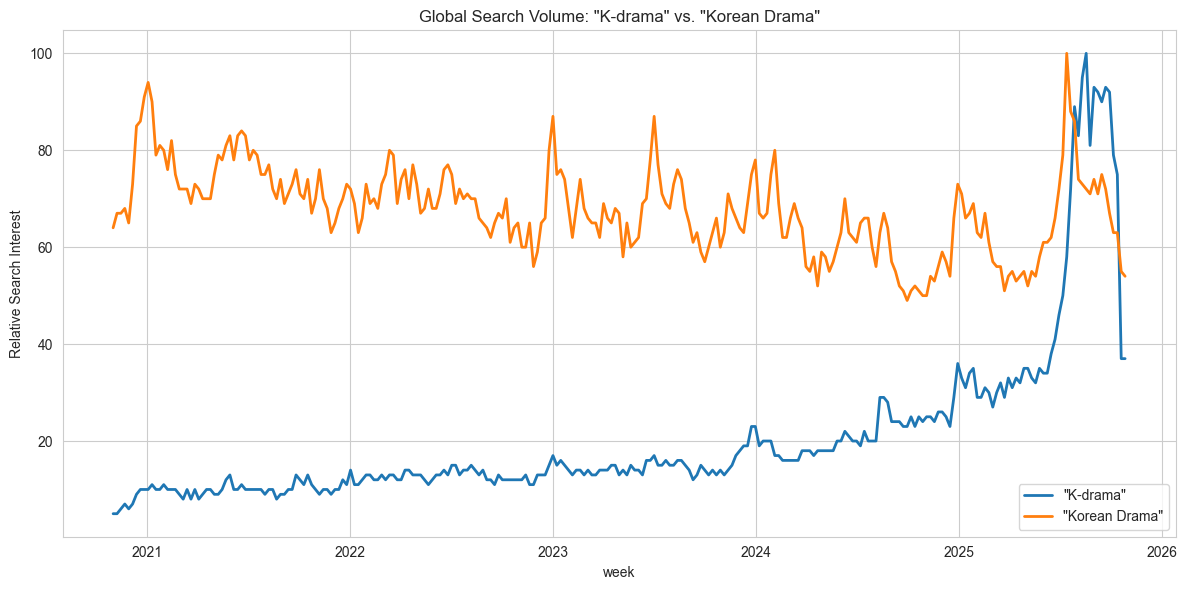

In [ ]:
# Merge them on 'week'
search_term_comparison = kdrama_past5yr_df.merge(korean_drama_past5yr_df, on='week')

# Convert 'week' to datetime
search_term_comparison['week'] = pd.to_datetime(search_term_comparison['week'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=search_term_comparison, x='week', y='kdrama_past5yr', label='"K-drama"', linewidth=2)
sns.lineplot(data=search_term_comparison, x='week', y='korean_drama_past5yr', label='"Korean Drama"', linewidth=2)
plt.title('Global Search Volume: "K-drama" vs. "Korean Drama"')
plt.ylabel('Relative Search Interest')
plt.legend()
plt.tight_layout()
plt.show()

## 2.2 "Learn Korean" a Global Phenomemon?
The Mystery Revealed: Despite 'K-drama' being the global gateway, the highest interest in learning Korean comes from unexpected regions. Hence there is some evidence suggesting entertainment is driving language demand in new markets.

### 2.2.1 Histogram of Countries "Learn Korean" interest ranking of at least 20

In [ ]:
# Load data
learn_korean_geo_past5yr_df = pd.read_csv(processed_filepaths['geo']['learn_korean']['past5yr'])
# learn_korean_geo_past5yr_df.info()

In [45]:
# Let's look at countries with interest > 20
countries_with_interest_df = (learn_korean_geo_past5yr_df
    [learn_korean_geo_past5yr_df['learn_korean_geo_past5yr'] > 20]
    .sort_values('learn_korean_geo_past5yr', ascending=False)
)

num_countries = len(countries_with_interest_df)
dynamic_height = max(600, num_countries * 25)  # 25px per country, minimum 600px

fig = px.bar(countries_with_interest_df,
             y='country',
             x='learn_korean_geo_past5yr',
             orientation='h',
             title='Countries with Search Interest > 20 for "Learn Korean"',
             labels={'learn_korean_geo_past5yr': 'Search Interest Score'},
             color='learn_korean_geo_past5yr',
             color_continuous_scale='Viridis')

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=dynamic_height,
    showlegend=False,
    title_x=0.5
)

fig.show()


## 2.2.2 Geomap Countries with Some "Learn Korean" interest

In [59]:
# Cleaner version using method chaining
fig_1a = (
    px.choropleth(
        countries_with_interest_df,
        locations='country',
        locationmode='country names',
        color='learn_korean_geo_past5yr',
        color_continuous_scale='Sunset',
        range_color=[0, 100],
        labels={'learn_korean_geo_past5yr': 'Search Interest'},
        title='<b>Part 1: The Mystery Global Search Interest for "Learn Korean" (Past 5 Years)</b>'
    )
    .update_layout(
        title_x=0.5,
        title_font_size=12,
        annotations=[dict(
            text="With markers for country with 20 or higher level of search interest",
            x=0.5, y=1.15, xref="paper", yref="paper",
            showarrow=False, font=dict(size=10, color="gray"), xanchor='center'
        )],
        coloraxis_colorbar=dict(
            len=0.5, thickness=15, x=1.02, y=0.5, 
            yanchor='middle', tickfont=dict(size=8)
        )
    )
    .update_geos(
        projection_type="natural earth",
        showcountries=True,
        countrycolor="lightgray",
        showocean=True,
        oceancolor="lightblue"
    )
)

# Add markers in one clean step
high_interest_countries = countries_with_interest_df[countries_with_interest_df['learn_korean_geo_past5yr'] >= 20]

fig_1a.add_scattergeo(
    locations=high_interest_countries['country'],
    locationmode='country names',
    marker=dict(size=8, color='red', symbol='star'),
    mode='markers',
    name="High Interest Countries",
    hoverinfo='skip'
)

fig_1a.show()

/var/folders/v2/hbdzpz01145d1p0yxb79y8f40000gn/T/ipykernel_1609/177327734.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_03"></a>
## 3.0 Part 2 The Correlation Evidence

While viral moments capture headlines, the true test of cultural impact lies in sustained trends. 

We analyzed five years of search data to see if the K-drama phenomenon drives lasting language learning interest, or if it's merely a series of temporary spikes.

In [80]:
# Load the Datasets and convert week col to datetime
kdrama_past5yr_df = pd.read_csv(processed_filepaths['timeline']['kdrama']['past5yr'])
kdrama_past5yr_df['week'] = pd.to_datetime(kdrama_past5yr_df['week'])
learn_korean_past5yr_df = pd.read_csv(processed_filepaths['timeline']['learn_korean']['past5yr'])
learn_korean_past5yr_df['week'] = pd.to_datetime(learn_korean_past5yr_df['week'])

#merge the datasets
kdrama_learnkorean_past5yr_df = kdrama_past5yr_df.merge(learn_korean_past5yr_df, on='week')

#print(kdrama_past5yr_df.head())
#print(learn_korean_past5yr_df.head())
#print(kdrama_learnkorean_past5yr_df.head())

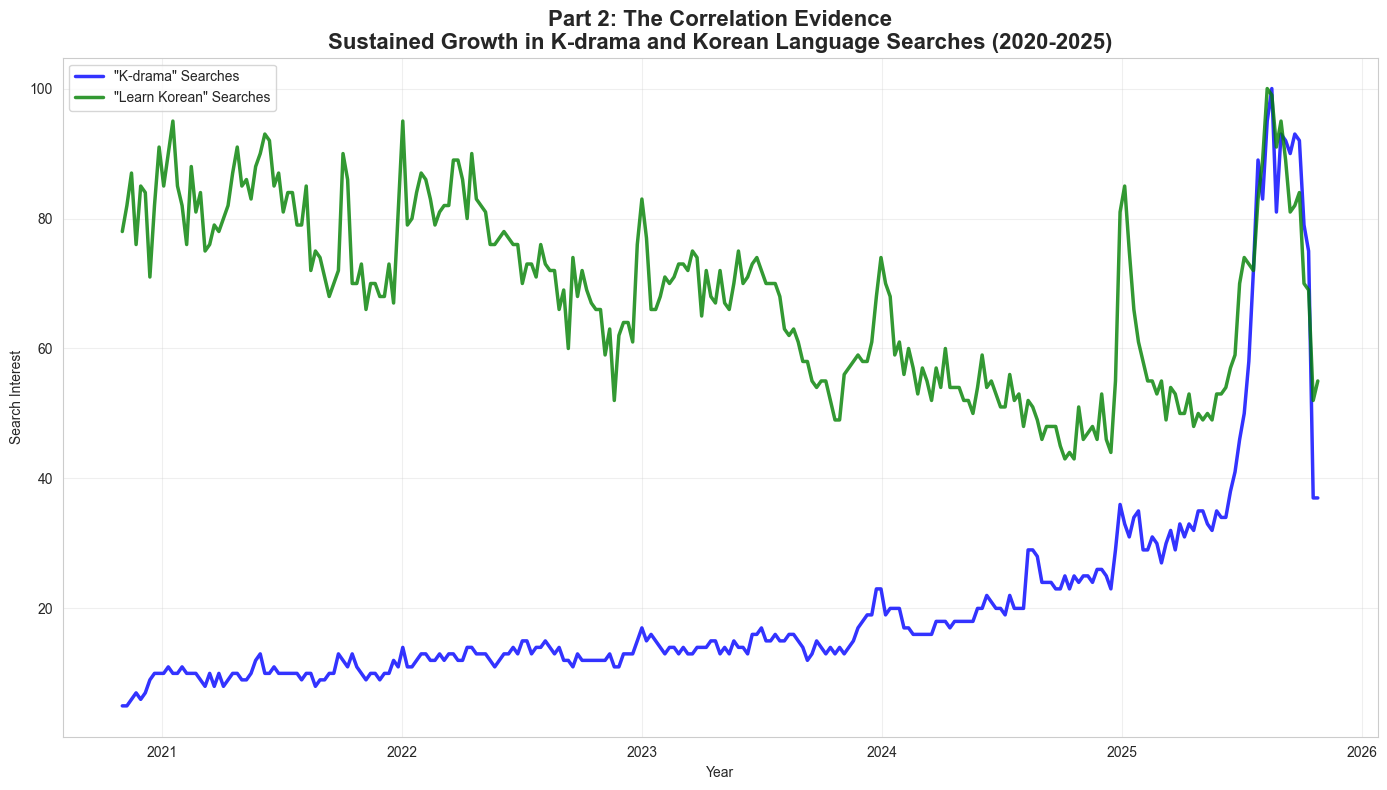

In [79]:
# Simpler version - no melting needed
plt.figure(figsize=(14, 8))

# Plot each line separately
sns.lineplot(data=kdrama_learnkorean_past5yr_df, x='week', y='kdrama_past5yr', 
             label='"K-drama" Searches', color='blue', linewidth=2.5, alpha=0.8)
sns.lineplot(data=kdrama_learnkorean_past5yr_df, x='week', y='learn_korean_past5yr', 
             label='"Learn Korean" Searches', color='green', linewidth=2.5, alpha=0.8)

plt.title('Part 2: The Correlation Evidence\nSustained Growth in K-drama and Korean Language Searches (2020-2025)', 
          fontsize=16, fontweight='bold')
plt.ylabel('Search Interest')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 🧐🕵🏻‍♂️ Conclusion:
The plot below reveals a nuanced relationship. While K-drama searches show steady growth, 'Learn Korean' interest is more volatile with periods of decline. 

However, both metrics share dramatic synchronized spikes and drops especially in late 2025 suggesting that      
  * even though sustained interest differs, **major cultural events create simultaneous surges** in both entertainment consumption and language learning intent.
  * This indicates that the K-drama to language learning pipeline **operates more through major breakthrough moments** than gradual cultural adoption.

Sometimes, the most compelling evidence comes from natural experiments. When Squid Game 1 exploded onto the global stage in 2021, it created perfect laboratory conditions to test our hypothesis: does blockbuster entertainment directly drive language learning? We will investigate that in the next section.

###### [↩️ Back to Table of Contents](#toc)

<a id="section_04"></a>
## 4.0 Part 3 The Smoking Gun - Squid Game Experiments
So when a global phenomenon like Squid Game hits (twice: once in 2021 and then in 2024), does it actually drive language learning interest? 
We isolated the weeks around both Season 1 and Season 2 releases to conduct natural experiments. 

***The results provide undeniable evidence of the entertainment-to-education pipeline in action.***

In [ ]:
# Release Dates for Squid Game 1 and Squid Game 2 set as constant
SQUID1_RELEASE = pd.to_datetime('2021-09-17')
SQUID2_RELEASE = pd.to_datetime('2024-12-26')


In [61]:
# Load the Squid Game 1 and 2 "K-Drama" Data and convert week col to DateTime
kdrama_squid1_df = pd.read_csv(processed_filepaths['timeline']['kdrama']['squidgame1'])
kdrama_squid2_df = pd.read_csv(processed_filepaths['timeline']['kdrama']['squidgame2'])
kdrama_squid1_df['week'] = pd.to_datetime(kdrama_squid1_df['week'])
kdrama_squid2_df['week'] = pd.to_datetime(kdrama_squid2_df['week'])

# Load the Squid Game 1 and 2 "Learn Korean" Data and convert week col to DateTime
learn_korean_squid1_df = pd.read_csv(processed_filepaths['timeline']['learn_korean']['squidgame1'])
learn_korean_squid2_df = pd.read_csv(processed_filepaths['timeline']['learn_korean']['squidgame2'])
learn_korean_squid1_df['week'] = pd.to_datetime(learn_korean_squid1_df['week'])
learn_korean_squid2_df['week'] = pd.to_datetime(learn_korean_squid2_df['week'])

# look at the data
print(kdrama_squid1_df.head())
print(learn_korean_squid2_df.head())

        week  kdrama_squidgame1
0 2020-12-27                 75
1 2021-01-03                 81
2 2021-01-10                 85
3 2021-01-17                 75
4 2021-01-24                 78
        week  learn_korean_squidgame2
0 2024-03-31                       64
1 2024-04-07                       70
2 2024-04-14                       63
3 2024-04-21                       64
4 2024-04-28                       64


<Figure size 1500x600 with 0 Axes>

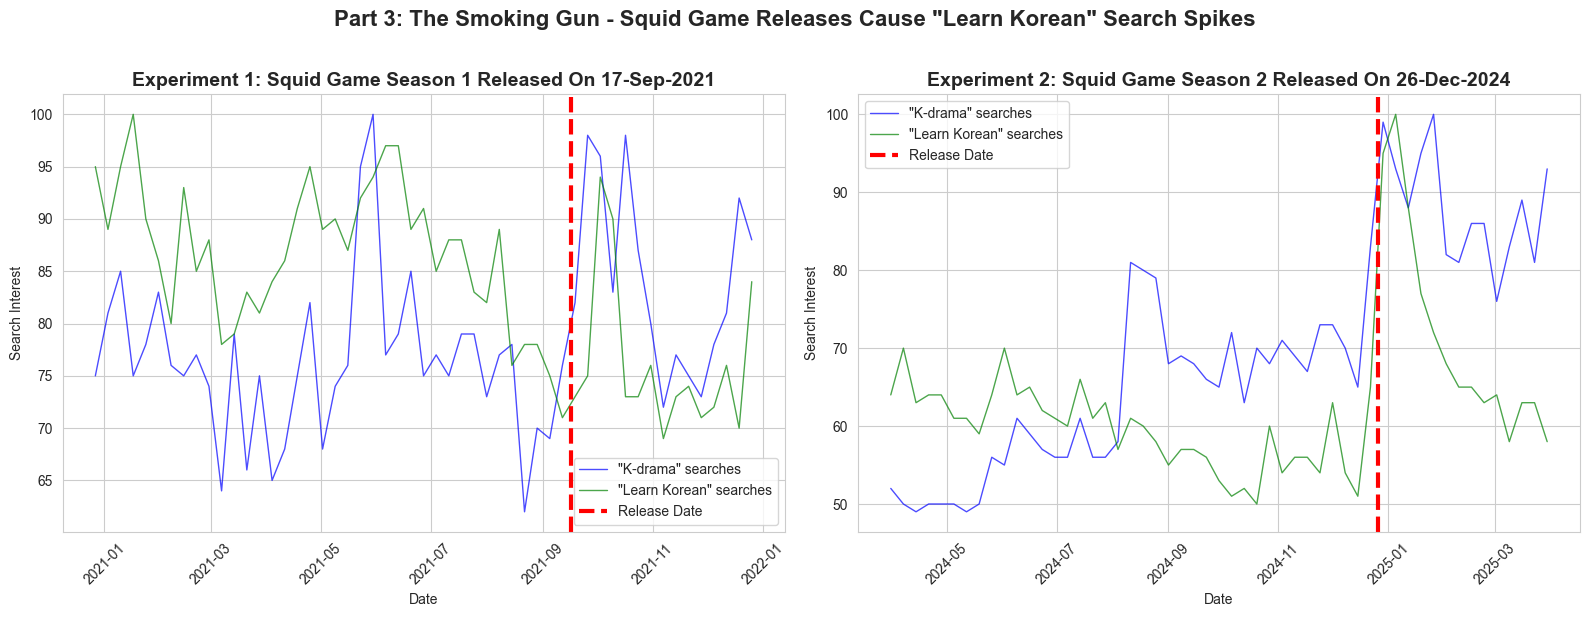

In [73]:
# Season 1 Plot
# Set up the style
plt.figure(figsize=(15, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Season 1 Plot
sns.lineplot(data=kdrama_squid1_df, x='week', y='kdrama_squidgame1', 
             ax=ax1, label='"K-drama" searches', color='blue', linewidth=1, alpha=0.7)
sns.lineplot(data=learn_korean_squid1_df, x='week', y='learn_korean_squidgame1', 
             ax=ax1, label='"Learn Korean" searches', color='green', linewidth=1, alpha=0.7)
ax1.axvline(pd.to_datetime(SQUID1_RELEASE), color='red', linestyle='--', linewidth=3, alpha=1, label='Release Date')
ax1.set_title(f'Experiment 1: Squid Game Season 1 Released On {pd.to_datetime(SQUID1_RELEASE).strftime("%d-%b-%Y")}', fontsize=14, fontweight='bold')
ax1.set_ylabel('Search Interest')
ax1.set_xlabel('Date')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Season 2 Plot
sns.lineplot(data=kdrama_squid2_df, x='week', y='kdrama_squidgame2', 
             ax=ax2, label='"K-drama" searches', color='blue', linewidth=1, alpha=0.7)
sns.lineplot(data=learn_korean_squid2_df, x='week', y='learn_korean_squidgame2', 
             ax=ax2, label='"Learn Korean" searches', color='green', linewidth=1, alpha=0.7)
ax2.axvline(pd.to_datetime(SQUID2_RELEASE), color='red', linestyle='--', linewidth=3, alpha=1, label='Release Date')
ax2.set_title(f'Experiment 2: Squid Game Season 2 Released On {pd.to_datetime(SQUID2_RELEASE).strftime("%d-%b-%Y")}', fontsize=14, fontweight='bold')
ax2.set_ylabel('Search Interest')
ax2.set_xlabel('Date')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('Part 3: The Smoking Gun - Squid Game Releases Cause "Learn Korean" Search Spikes', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

The evidence is clear and repeatable: both Season 1 and Season 2 releases caused immediate, significant spikes in 'Learn Korean' searches.
Within weeks of each premiere, search interest surged dramatically, proving this isn't coincidence but a causal relationship.


### 🧐🕵🏻‍♂️ Conclusion:
***The visual correlation is unmistakable - entertainment consumption directly triggers language learning intent.***

This however raises a crucial question: 
>_Are these just temporary spikes, or do they represent sustained interest?_

In our next analysis, we'll examine whether this initial curiosity transforms into long-term learning commitment, or if it is just a passing trend?

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_05"></a>
## 5.0 Part 4 The Geographic Proof: Pipeline Mapping
Global trends often hide regional nuances. We mapped the geographic pipeline to discover 
which countries transform K-drama viewership into language learning, and which remain casual consumers 
of entertainment without educational follow-through.

In [107]:
# Prep the Data
kdrama_geo_past5yr_df = pd.read_csv(processed_filepaths['geo']['kdrama']['past5yr'])
learn_korean_geo_past5yr_df = pd.read_csv(processed_filepaths['geo']['learn_korean']['past5yr'])

# Merge the geo data for both search terms
geo_kdrama_learnkorean_pipeline = kdrama_geo_past5yr_df.merge(
    learn_korean_geo_past5yr_df, 
    on='country', 
    suffixes=('_kdrama', '_learn_korean')
)
print('All countries:')
print(geo_kdrama_learnkorean_pipeline.head())
print(geo_kdrama_learnkorean_pipeline.describe)

# keep countries that have interest in either K-drama OR Learn Korean.
geo_kdrama_learnkorean_pipeline = geo_kdrama_learnkorean_pipeline[
    (geo_kdrama_learnkorean_pipeline['learn_korean_geo_past5yr'] > 0) | 
    (geo_kdrama_learnkorean_pipeline['kdrama_geo_past5yr'] > 0)
]
# print('Countries with some interest in either search terms:')
# print(geo_kdrama_learnkorean_pipeline.head())
# print(geo_kdrama_learnkorean_pipeline.describe)


All countries:
       country  kdrama_geo_past5yr  learn_korean_geo_past5yr
0      Mayotte                 0.0                       0.0
1   Madagascar               100.0                       0.0
2       Bhutan                 0.0                       0.0
3  Philippines                59.0                      94.0
4     Djibouti                 0.0                       0.0
<bound method NDFrame.describe of             country  kdrama_geo_past5yr  learn_korean_geo_past5yr
0           Mayotte                 0.0                       0.0
1        Madagascar               100.0                       0.0
2            Bhutan                 0.0                       0.0
3       Philippines                59.0                      94.0
4          Djibouti                 0.0                       0.0
..              ...                 ...                       ...
245          Kosovo                 0.0                       0.0
246   French Guiana                 0.0                  

In [108]:
# assign each country into one of the 4 quadrants
## need to drop the index first 
geo_pipeline_noindex = geo_kdrama_learnkorean_pipeline.reset_index(drop=True)
geo_pipeline_noindex['category'] = 'Low Interest'

for i in range(len(geo_pipeline_noindex)):
    if geo_pipeline_noindex.loc[i, 'kdrama_geo_past5yr'] >= 30:
        if geo_pipeline_noindex.loc[i, 'learn_korean_geo_past5yr'] >= 30:
            geo_pipeline_noindex.loc[i, 'category'] = 'Perfect Pipeline'
        else:
            geo_pipeline_noindex.loc[i, 'category'] = 'Casual Viewers'
    elif geo_pipeline_noindex.loc[i, 'learn_korean_geo_past5yr'] >= 30:
        geo_pipeline_noindex.loc[i, 'category'] = 'Mystery Learners'

# print(geo_pipeline_noindex.head())
# print(geo_pipeline_noindex.value_counts())

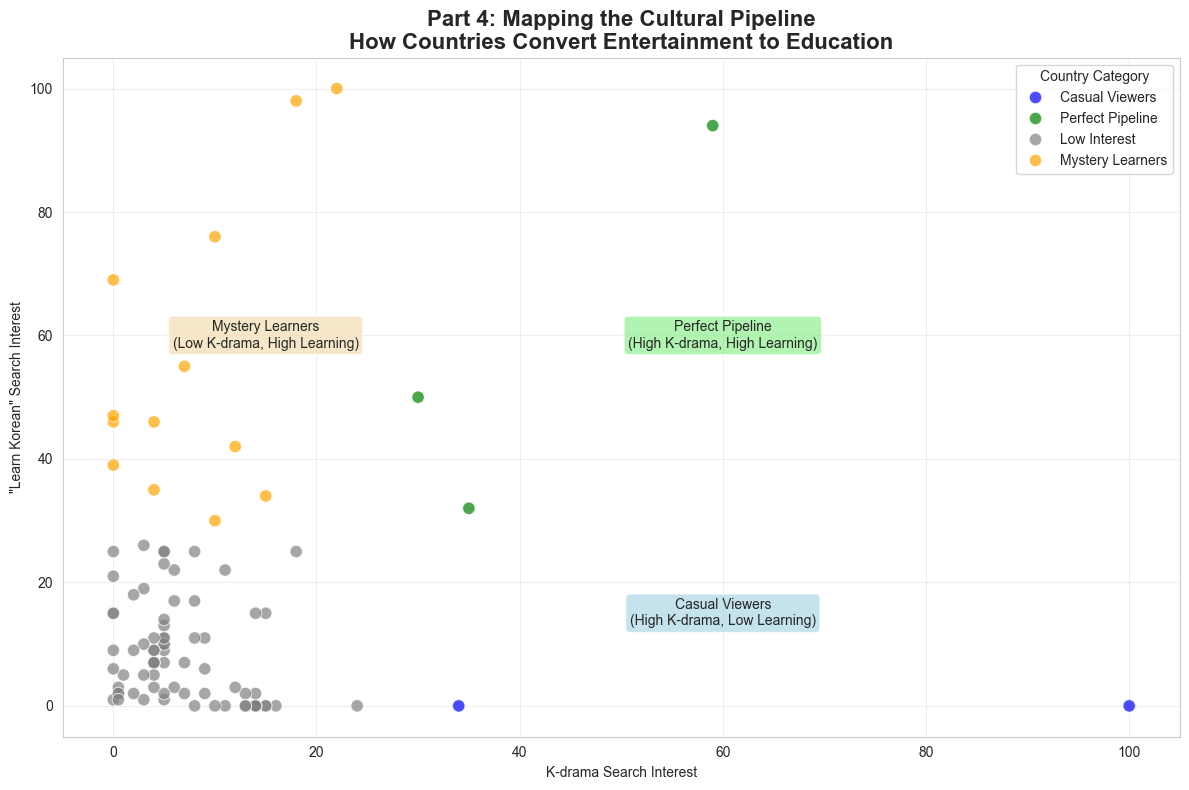

In [ ]:
# Seaborn version with hue encoding
plt.figure(figsize=(12, 8))

# Create the plot
sns.scatterplot(data=geo_pipeline_noindex, 
                x='kdrama_geo_past5yr', 
                y='learn_korean_geo_past5yr',
                hue='category',
                palette={'Perfect Pipeline': 'green', 
                        'Casual Viewers': 'blue', 
                        'Mystery Learners': 'orange',
                        'Low Interest': 'grey'},
                s=80,
                alpha=0.7)

plt.xlabel('K-drama Search Interest')
plt.ylabel('"Learn Korean" Search Interest')
plt.title('Part 4: Mapping the Cultural Groups\nHow Countries Convert Entertainment to Education', 
          fontsize=16, fontweight='bold')

# Add quadrant labels
plt.text(60, 60, 'Perfect Pipeline\n(High K-drama, High Learning)', 
         fontsize=10, ha='center', va='center', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
plt.text(60, 15, 'Casual Viewers\n(High K-drama, Low Learning)', 
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
plt.text(15, 60, 'Mystery Learners\n(Low K-drama, High Learning)', 
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.7))

plt.legend(title='Country Category')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [113]:
fig = px.scatter(geo_pipeline_noindex, 
                 x='kdrama_geo_past5yr', 
                 y='learn_korean_geo_past5yr',
                 color='category',
                 hover_name='country',  # Shows country on hover
                 color_discrete_map={  # Force specific colors
                     'Perfect Pipeline': 'red',
                     'Casual Viewers': 'blue', 
                     'Mystery Learners': 'orange',
                     'Low Interest': 'gray'
                 },
                 title='<b>Part 4: Mapping the Cultural Groups<br>How Countries Convert Entertainment to Education<b>',
                 labels={'kdrama_geo_past5yr': 'K-drama Search Interest',
                        'learn_korean_geo_past5yr': '"Learn Korean" Search Interest'})


# Add quadrant backgrounds with matching colors
fig.add_shape(type="rect", x0=30, y0=30, x1=100, y1=100,
              line=dict(width=0), fillcolor="red", opacity=0.1)

fig.add_shape(type="rect", x0=30, y0=0, x1=100, y1=30,
              line=dict(width=0), fillcolor="blue", opacity=0.1)

fig.add_shape(type="rect", x0=0, y0=30, x1=30, y1=100,
              line=dict(width=0), fillcolor="orange", opacity=0.1)

fig.add_shape(type="rect", x0=0, y0=0, x1=30, y1=30,
              line=dict(width=0), fillcolor="gray", opacity=0.1)




fig.show()



The Quadrant analysis reveals three distinct cultural groups:

* 🟥 *The Perfect Pipeline* _(in Top-right quadrant)_: Countries like the Philippines that efficiently convert K-drama entertainment into Korean language learning interest
* 🟦 *The Casual Consumers* _(in Bottom-right)_: Countries like Madagascar that consume K-drama content but show limited interest in language learning
* 🟧 *The Mystery Learners* _(in Top-left_): Countries like Myanmar with strong language learning interest despite lower K-drama engagement, suggesting alternative cultural influences


### 🧐🕵🏻‍♂️ Conclusion:
***Not all K-drama viewers become language learners***. 

Google Trends data suggests that the entertainment-to-education pipeline operates strongest in specific geographic and cultural contexts, with Southeast Asia showing the most efficient conversion of cultural interest into educational motivation.

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

--------------------------------

<a id="section_06"></a>
## 6.0 Part 5 The Sustained Wave - Beyond Viral Moments

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_07"></a>
## 7.0 Limitations & Conclusions

###### [↩️ Back to Table of Contents](#toc)

--------------------------------

<a id="section_08"></a>
## 8.0 Credits

###### [↩️ Back to Table of Contents](#toc)

--------------------------------